In [9]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor


from sklearn import metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# from sklearn.preprocessing import Imputer


from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [7]:
import sklearn.model_selection
help(sklearn.model_selection)

Help on package sklearn.model_selection in sklearn:

NAME
    sklearn.model_selection

PACKAGE CONTENTS
    _search
    _split
    _validation
    tests (package)

CLASSES
    builtins.object
        sklearn.model_selection._search.ParameterGrid
        sklearn.model_selection._search.ParameterSampler
        sklearn.model_selection._split.BaseCrossValidator
            sklearn.model_selection._split.LeaveOneGroupOut
            sklearn.model_selection._split.LeaveOneOut
            sklearn.model_selection._split.LeavePGroupsOut
            sklearn.model_selection._split.LeavePOut
            sklearn.model_selection._split.PredefinedSplit
    sklearn.model_selection._search.BaseSearchCV(sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
        sklearn.model_selection._search.GridSearchCV
        sklearn.model_selection._search.RandomizedSearchCV
    sklearn.model_selection._split.BaseShuffleSplit(builtins.object)
        sklearn.model_selection._split.ShuffleSplit
          

In [26]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df = pd.read_excel(xlsx, '1x 5s')
dataset= df.copy()

In [27]:
# the 'sample' method takes a certain fraction randomly
#Note that we use `random_state` to ensure the reproducibility of the examples.
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)



# split datat into input and target

train_input = train_dataset.copy()
test_input = test_dataset.copy()

train_target = train_input.pop('RHOB')
test_target = test_input.pop('RHOB')



## Parameters
#### Default parameters
max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

## Explanation of relevant parameters for this kernel.

* <strong>booster</strong>: Select the type of model to run at each iteration
* <strong>gbtree</strong>: tree-based models
* <strong>gblinear</strong>: linear models
* <strong>nthread</strong>: default to maximum number of threads available if not set
*<strong>objective</strong>: This defines the loss function to be minimized

#### Parameters for controlling speed

* <strong>subsample</strong>: Denotes the fraction of observations to be randomly samples for each tree
* <strong>colsample_bytree</strong>: Subsample ratio of columns when constructing each tree.
* <strong>n_estimators</strong>: Number of trees to fit.

#### Important parameters which control overfiting

* <strong>learning_rate</strong>: Makes the model more robust by shrinking the weights on each step
* <strong>max_depth</strong>: The maximum depth of a tree.
* <strong>min_child_weight</strong>: Defines the minimum sum of weights of all observations required in a child.

# Tuning the hyper-parameters

## GridSearchCV params:

* <strong> estimator</strong>: estimator object
* <strong> param_grid </strong>: dict or list of dictionaries
* <strong> scoring</strong>: A single string or a callable to evaluate the predictions on the test set. If None, the estimator’s score method is used.
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
* <strong>n_jobs</strong>: Number of jobs to run in parallel. None means. -1 means using all processors.
*<strong>cv </strong>: cross-validation, None, to use the default 3-fold cross validation. Integer, to specify the number of folds in a (Stratified)KFold.

## RandomizedSearchCV params:
* <strong>estimator</strong>:
* <strong>param_distributions</strong>:
* <strong>cv</strong>:
* <strong>n_iter</strong>:
* <strong>scoring</strong>:
* <strong>n_jobs</strong>:
* <strong>verbose</strong>:
* <strong> return_train_score</strong>:
* <strong>random_state</strong>:



In [14]:
## Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
objective = ['reg:squarederror']


subsample = [0.5, 0.7]
colsample_bytree= [0.5, 0.7]
n_estimators = [100, 500, 900, 1100, 1500]

learning_rate=[0.05,0.01,0.05, 0.08,0.095, 0.1,0.15,0.20]
max_depth = [2, 3, 5, 10, 15 ]
min_child_weight=[1,2,3,4,6,8,10]

In [17]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


hyperparameter_grid2={
    
}

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [21]:
# Set up the random search with 4-fold cross validation
import xgboost
xgb_model1 =xgboost.XGBRegressor()

xgb_model2 = XGBRegressor()

random_cv = RandomizedSearchCV(estimator=xgb_model1,
                                param_distributions=hyperparameter_grid,
                                cv=5, 
                                n_iter=50,
                                scoring = 'neg_mean_absolute_error',
                                n_jobs = 4,
                                verbose = 5, 
                                return_train_score = True,
                                random_state=42)


gsearch = GridSearchCV(estimator = xgb_model2,
                        param_grid = param_tuning,                        
                        #scoring = 'neg_mean_absolute_error', #MAE
                        #scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)



In [ ]:
# help(RandomizedSearchCV)

# help(GridSearchCV)

In [11]:
    xgb_model = XGBRegressor()
    xgb_model.fit(train_input, train_target, early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False)





In [28]:
    gsearch.fit(train_input, train_target,
                eval_set=[(test_input, test_target)],
               early_stopping_rounds=10
               )

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  6.8min


[0]	validation_0-rmse:1.56568
[1]	validation_0-rmse:1.41044
[2]	validation_0-rmse:1.27026
[3]	validation_0-rmse:1.14423
[4]	validation_0-rmse:1.03057
[5]	validation_0-rmse:0.92840
[6]	validation_0-rmse:0.83637
[7]	validation_0-rmse:0.75370
[8]	validation_0-rmse:0.67953
[9]	validation_0-rmse:0.61263
[10]	validation_0-rmse:0.55281
[11]	validation_0-rmse:0.49878
[12]	validation_0-rmse:0.45030
[13]	validation_0-rmse:0.40693
[14]	validation_0-rmse:0.36793
[15]	validation_0-rmse:0.33265
[16]	validation_0-rmse:0.30103
[17]	validation_0-rmse:0.27293
[18]	validation_0-rmse:0.24776
[19]	validation_0-rmse:0.22526
[20]	validation_0-rmse:0.20518
[21]	validation_0-rmse:0.18731
[22]	validation_0-rmse:0.17081
[23]	validation_0-rmse:0.15670
[24]	validation_0-rmse:0.14354
[25]	validation_0-rmse:0.13178
[26]	validation_0-rmse:0.12138


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.2min finished


[27]	validation_0-rmse:0.11214
[28]	validation_0-rmse:0.10391
[29]	validation_0-rmse:0.09663
[30]	validation_0-rmse:0.09023
[31]	validation_0-rmse:0.08471
[32]	validation_0-rmse:0.07980
[33]	validation_0-rmse:0.07580
[34]	validation_0-rmse:0.07180
[35]	validation_0-rmse:0.06881
[36]	validation_0-rmse:0.06592
[37]	validation_0-rmse:0.06355
[38]	validation_0-rmse:0.06161
[39]	validation_0-rmse:0.05954
[40]	validation_0-rmse:0.05812
[41]	validation_0-rmse:0.05661
[42]	validation_0-rmse:0.05563
[43]	validation_0-rmse:0.05461
[44]	validation_0-rmse:0.05385
[45]	validation_0-rmse:0.05318
[46]	validation_0-rmse:0.05224
[47]	validation_0-rmse:0.05168
[48]	validation_0-rmse:0.05102
[49]	validation_0-rmse:0.05038
[50]	validation_0-rmse:0.05007
[51]	validation_0-rmse:0.04985
[52]	validation_0-rmse:0.04953
[53]	validation_0-rmse:0.04922
[54]	validation_0-rmse:0.04898
[55]	validation_0-rmse:0.04889
[56]	validation_0-rmse:0.04864
[57]	validation_0-rmse:0.04836
[58]	validation_0-rmse:0.04813
[59]	val

[286]	validation_0-rmse:0.04136
[287]	validation_0-rmse:0.04136
[288]	validation_0-rmse:0.04134
[289]	validation_0-rmse:0.04133
[290]	validation_0-rmse:0.04132
[291]	validation_0-rmse:0.04130
[292]	validation_0-rmse:0.04130
[293]	validation_0-rmse:0.04130
[294]	validation_0-rmse:0.04130
[295]	validation_0-rmse:0.04129
[296]	validation_0-rmse:0.04129
[297]	validation_0-rmse:0.04129
[298]	validation_0-rmse:0.04128
[299]	validation_0-rmse:0.04128
[300]	validation_0-rmse:0.04126
[301]	validation_0-rmse:0.04126
[302]	validation_0-rmse:0.04125
[303]	validation_0-rmse:0.04125
[304]	validation_0-rmse:0.04124
[305]	validation_0-rmse:0.04124
[306]	validation_0-rmse:0.04124
[307]	validation_0-rmse:0.04123
[308]	validation_0-rmse:0.04123
[309]	validation_0-rmse:0.04124
[310]	validation_0-rmse:0.04122
[311]	validation_0-rmse:0.04122
[312]	validation_0-rmse:0.04121
[313]	validation_0-rmse:0.04121
[314]	validation_0-rmse:0.04120
[315]	validation_0-rmse:0.04120
[316]	validation_0-rmse:0.04120
[317]	va

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [29]:
# Best params
gsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [30]:
random_cv.fit(train_input, train_target,
                eval_set=[(test_input, test_target)],
               early_stopping_rounds=10
               )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min


[0]	validation_0-rmse:1.19481
[1]	validation_0-rmse:0.95741
[2]	validation_0-rmse:0.76778
[3]	validation_0-rmse:0.61646
[4]	validation_0-rmse:0.49555
[5]	validation_0-rmse:0.39901
[6]	validation_0-rmse:0.32223
[7]	validation_0-rmse:0.26095
[8]	validation_0-rmse:0.21232
[9]	validation_0-rmse:0.17414
[10]	validation_0-rmse:0.14389
[11]	validation_0-rmse:0.12030
[12]	validation_0-rmse:0.10247
[13]	validation_0-rmse:0.08852
[14]	validation_0-rmse:0.07805
[15]	validation_0-rmse:0.07002
[16]	validation_0-rmse:0.06442
[17]	validation_0-rmse:0.06005


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.5min finished


[18]	validation_0-rmse:0.05715
[19]	validation_0-rmse:0.05438
[20]	validation_0-rmse:0.05251
[21]	validation_0-rmse:0.05144
[22]	validation_0-rmse:0.05040
[23]	validation_0-rmse:0.04948
[24]	validation_0-rmse:0.04895
[25]	validation_0-rmse:0.04859
[26]	validation_0-rmse:0.04840
[27]	validation_0-rmse:0.04802
[28]	validation_0-rmse:0.04788
[29]	validation_0-rmse:0.04773
[30]	validation_0-rmse:0.04764
[31]	validation_0-rmse:0.04761
[32]	validation_0-rmse:0.04748
[33]	validation_0-rmse:0.04738
[34]	validation_0-rmse:0.04732
[35]	validation_0-rmse:0.04703
[36]	validation_0-rmse:0.04683
[37]	validation_0-rmse:0.04677
[38]	validation_0-rmse:0.04672
[39]	validation_0-rmse:0.04650
[40]	validation_0-rmse:0.04644
[41]	validation_0-rmse:0.04644
[42]	validation_0-rmse:0.04611
[43]	validation_0-rmse:0.04595
[44]	validation_0-rmse:0.04595
[45]	validation_0-rmse:0.04580
[46]	validation_0-rmse:0.04558
[47]	validation_0-rmse:0.04538
[48]	validation_0-rmse:0.04525
[49]	validation_0-rmse:0.04488
[50]	val

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [31]:
# Best params
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
#Run only in the first run of the kernel.
hyperParameterTuning(train_input, train_target)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.5min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
Best Params
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.5}


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.7}

### Best Fit

In [14]:


# %time xgb_model.fit(train_input, train_target, early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False)


model_Test = XGBRegressor(booster='gbtree',
                        objective = 'reg:squarederror',
                        colsample_bytree = 0.7,
                        learning_rate = 0.1,
                        max_depth = 10,
                        min_child_weight = 1,
                        n_estimators = 500,
                        subsample = 0.7
                        
                        )
model_Test.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )



# y_pred_xgb = xgb_model.predict(X_val)

# mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

# print("MAE: ", mae_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
model_Test2= XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


model_Test2.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Plot Results

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'Predicted')

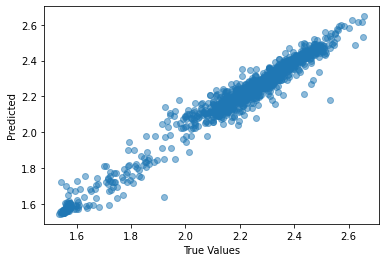

In [35]:
predicted = model_Test2.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted, alpha=0.5)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')





# #Plot Real vs Predict
# plt.scatter(X_val['GrLivArea'] * 0.092903, y_val,          color='blue', label='Real',    alpha=0.5)
# plt.scatter(X_val['GrLivArea'] * 0.092903, y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
# plt.title("Real vs Predict")
# plt.legend(loc='best')
# plt.show()

In [36]:
print("r2 score: {}".format(metrics.r2_score(test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error(test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.9633023566594353
mse: 0.0017571954456677282
rmse: 0.041918915129899634
mae: 0.027588463736446252


# Predict from diff well

In [38]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df2 = pd.read_excel(xlsx, '1x 4s')
dataset2= df2.copy()


# split datat into input and target

inputs2 = dataset2.copy()
target2 = inputs2.pop('RHOB')

D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'predicted')

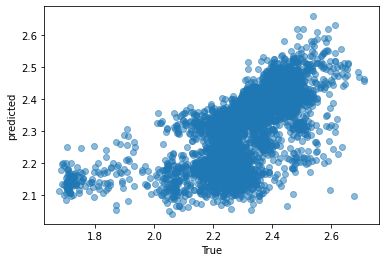

In [39]:
# predicted = model.predict(test_input)

predicted2 = model_Test2.predict(inputs2)
fig, ax= plt.subplots()
ax.scatter(target2,predicted2, alpha=0.5)
ax.set_xlabel("True")
ax.set_ylabel("predicted")

In [40]:
print("r2 score: {}".format(metrics.r2_score( target2, predicted2)))
print("mse: {}".format(metrics.mean_squared_error( target2, predicted2)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error( target2, predicted2))))
print("mae: {}".format(metrics.mean_absolute_error( target2, predicted2)))

r2 score: 0.4211295504957051
mse: 0.013707021846683471
rmse: 0.1170769911070637
mae: 0.08187839208980338


In [ ]:
# Predic Test & Submission

X_test = test_005

# Use the model to make predictions
y_pred_test = xgb_model.predict(X_test)

submission = pd.DataFrame({'Id':test_id,'SalePrice':y_pred_test})

# Save results
submission.to_csv("submission.csv",index=False)